In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin


In [8]:
start = '2010-01-01'
end = '2019-12-31'

yfin.pdr_override()

df = pdr.get_data_yahoo('AAPL', start, end)

print(df.head())

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.487534  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.498750  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.395378  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.383556  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.425996  447610800


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261612,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327469,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702919,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676102,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095566,144114400


In [10]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [11]:
df = df.drop (['Date', 'Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


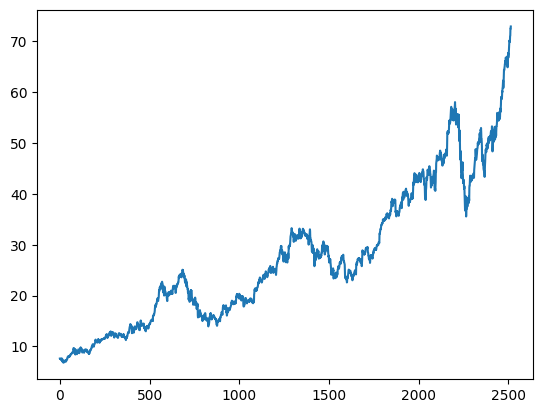

In [12]:
plt.plot(df. Close)

In [13]:
ma100 = df. Close.rolling (100) .mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

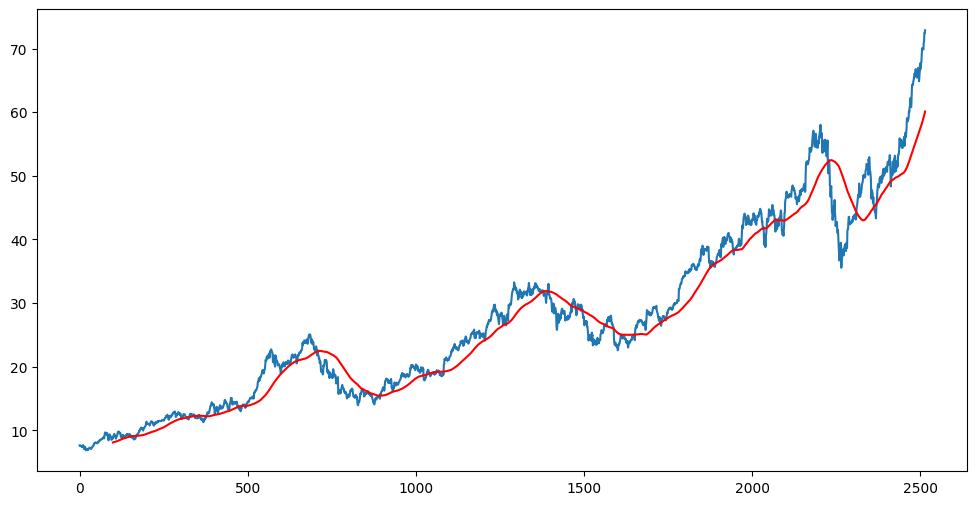

In [14]:
plt. figure (figsize = (12,6))
plt.plot (df.Close)
plt.plot (ma100, 'r')

In [15]:
ma200 = df.Close.rolling (200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

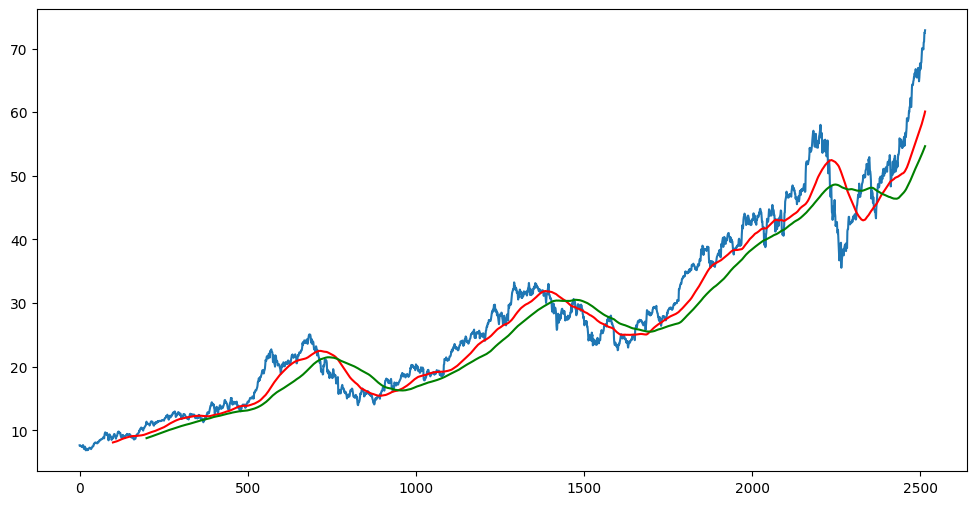

In [16]:
plt. figure (figsize = (12,6))
plt.plot(df. Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [30]:
df.shape

(2515, 5)

In [37]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df [ 'Close' ][0:int(len (df) *0.70)])
data_testing = pd.DataFrame (df [ 'Close' ][int(len (df)*0.70): int(len (df))])
print (data_training.shape)
print (data_testing.shape)

(1760, 1)
(755, 1)


In [39]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [40]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [44]:
data_training_array.shape

(1760, 1)

In [46]:
x_train= []
y_train = []
for i in range (100, data_training_array.shape [0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array (x_train), np. array(y_train)

In [48]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [50]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                input_shape = (x_train.shape [1], 1)))
model.add (Dropout (0.2))

model.add(LSTM (units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM (units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add (LSTM (units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add (Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [51]:
model.compile (optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 22s 297ms/step - loss: 0.0653
Epoch 2/50
52/52 [==============================] - 16s 312ms/step - loss: 0.0127
Epoch 3/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0107
Epoch 4/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0102
Epoch 5/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0099
Epoch 6/50
52/52 [==============================] - 13s 259ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 13s 260ms/step - loss: 0.0089
Epoch 8/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0071
Epoch 9/50
52/52 [==============================] - 14s 265ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 14s 275ms/step - loss: 0.0064
Epoch 11/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 15s 279ms/step - loss: 0.0064
Epoch 13/50
5

In [52]:
model.save('keras_model.h5')

c:\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


past_100_days = data_training.tail(100)

In [58]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [60]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [62]:
input_data.shape

(855, 1)

In [64]:
x_test = []
y_test = []
for i in range (100, input_data.shape [0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test.shape)
print (y_test.shape)

(755, 100, 1)
(755,)


In [66]:
#making predictions

y_predicted = model.predict(x_test)
y_predicted.shape

24/24 [==============================] - 1s 50ms/step


(755, 1)

In [69]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [71]:
y_predicted

array([[0.1429418 ],
       [0.14394069],
       [0.14487466],
       [0.14571717],
       [0.14644623],
       [0.14704867],
       [0.14752707],
       [0.14790061],
       [0.14819616],
       [0.14844559],
       [0.14867571],
       [0.14890467],
       [0.14914933],
       [0.14942376],
       [0.14973432],
       [0.15008265],
       [0.15046647],
       [0.15087943],
       [0.1513254 ],
       [0.15181267],
       [0.15234756],
       [0.15292984],
       [0.15355134],
       [0.1542532 ],
       [0.15509379],
       [0.15612766],
       [0.1573353 ],
       [0.15872906],
       [0.16034889],
       [0.16222087],
       [0.16435204],
       [0.16664949],
       [0.16909443],
       [0.17169273],
       [0.17443933],
       [0.17731921],
       [0.18031117],
       [0.18338555],
       [0.1865057 ],
       [0.18963176],
       [0.19272563],
       [0.19575319],
       [0.19869223],
       [0.20152682],
       [0.20424688],
       [0.20684502],
       [0.20931615],
       [0.211

In [73]:
scaler.scale_

array([0.02123255])

In [74]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test=y_test * scale_factor

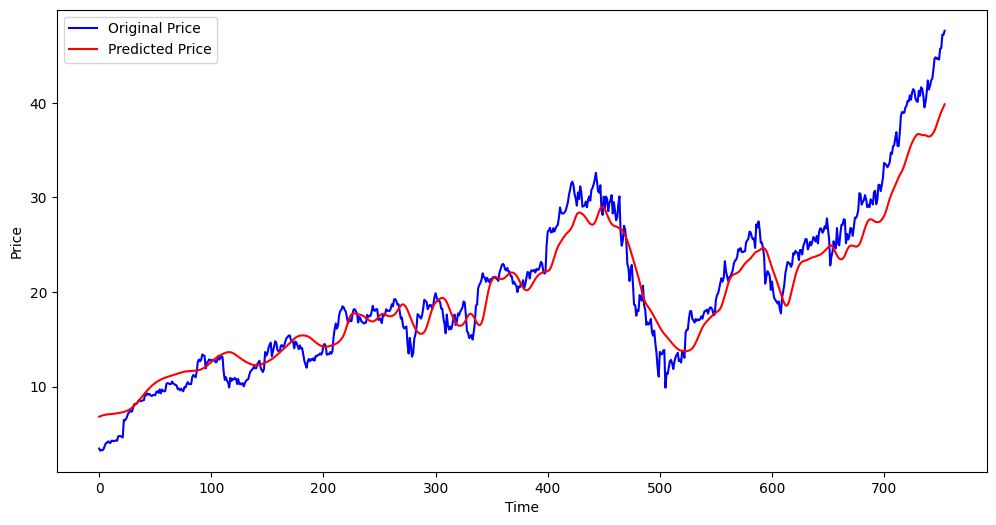

In [75]:
plt. figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend ()
plt.show()